# 8.1 序列模型
- **目录**
  - 8.1.1 统计工具
    - 8.1.1.1 自回归模型
    - 8.1.1.2 马尔可夫模型
    - 8.1.1.3 因果关系
  - 8.1.2 序列模型训练
  - 8.1.3 序列模型预测

想象一下你正在看网飞（Netflix，一个国外的视频网站）上的电影。
作为一名忠实的用户，你对每一部电影都给出评价，
毕竟一部好电影需要更多的支持和认可。
然而事实证明，事情并不那么简单。
随着时间的推移，人们对电影的看法会发生很大的变化。
事实上，心理学家甚至对这些现象起了名字：

* **锚定（anchoring）效应**：基于其他人的意见做出评价。
  例如，奥斯卡颁奖后，受到关注的电影的评分会上升，尽管它还是原来那部电影。
  这种影响将持续几个月，直到人们忘记了这部电影曾经获得的奖项。
  结果表明，这种效应会使评分提高半个百分点以上。
* **享乐适应（hedonic adaption）**：人们迅速接受并且适应一种更好或者更坏的情况
  作为新的常态。
  例如，在看了很多好电影之后，人们会强烈期望下部电影会更好。
  因此，在许多精彩的电影被看过之后，即使是一部普通的也可能被认为是糟糕的。
* **季节性（seasonality）**：少有观众喜欢在八月看圣诞老人的电影。
* 有时，电影会由于导演或演员在制作中的不当行为变得不受欢迎。
* 有些电影因为其极度糟糕只能成为小众电影。*Plan9 from Outer Space*和*Troll2*就因为这个原因而臭名昭著的。

简而言之，电影评分决不是固定不变的。
因此，使用**时间动力学**可以得到更准确的电影推荐。
当然，序列数据不仅仅是关于电影评分的。
下面给出了更多的场景：

* 在使用应用程序时，许多用户都有很强的特定习惯。
  例如，在学生放学后社交媒体应用更受欢迎。在市场开放时股市交易软件更常用。
* 预测明天的股价要比过去的股价更困难，尽管两者都只是估计一个数字。
  毕竟，先见之明比事后诸葛亮难得多。
  在统计学中，前者（对超出已知观测范围进行预测）称为**外推法（extrapolation）**，
  而后者（在现有观测值之间进行估计）称为**内插法（interpolation）**。
* 在本质上，音乐、语音、文本和视频都是连续的。
  如果它们的序列被我们重排，那么就会失去原有的意义。
  比如，一个文本标题“狗咬人”远没有“人咬狗”那么令人惊讶，尽管组成两句话的字完全相同。
* 地震具有很强的相关性，即大地震发生后，很可能会有几次小余震，
  这些余震的强度比非大地震后的余震要大得多。
  事实上，地震是时空相关的，即余震通常发生在很短的时间跨度和很近的距离内。
* 人类之间的互动也是连续的，这可以从微博上的争吵和辩论中看出。

- **要点：**
  - 序列数据并非固定不变的，例如电影评分可以受到多种因素如锚定效应、享乐适应、季节性等影响。使用时间动力学可以得到更准确的电影推荐。

  - 在使用应用程序时，许多用户都有很强的特定习惯。例如，在学生放学后社交媒体应用更受欢迎。在市场开放时股市交易软件更常用。

  - 预测未来的数据（外推法）比估计已知范围内的数据（内插法）更困难。比如，预测明天的股价要比过去的股价更困难。

  - 音乐、语音、文本和视频都是连续的序列数据，如果它们的序列被我们重排，那么就会失去原有的意义。

  - 地震具有很强的相关性，即大地震发生后，很可能会有几次小余震，这些余震的强度比非大地震后的余震要大得多。

  - 人类之间的互动也是连续的，这可以从微博上的争吵和辩论中看出。

## 8.1.1 统计工具

处理序列数据需要统计工具和新的深度神经网络架构。
为了简单起见，我们以图8.1.1所示的股票价格（富时100指数）为例。
<center>
<img src="../img/ftse100.png" alt="近30年的富时100指数" height=400 width=400>
</center>
<center>
    图8.1.1 近30年的富时100指数
</center>
<br>
其中，用$x_t$表示价格，即在<b>时间步（time step）</b>
$t \in \mathbb{Z}^+$(即t为正整数)时，观察到的价格$x_t$。
请注意，$t$对于本文中的序列通常是<b>离散</b>的，并在整数或其子集上变化。
假设一个交易员想在$t$日的股市中表现良好，于是通过以下途径预测$x_t$：

$$x_t \sim P(x_t \mid x_{t-1}, \ldots, x_1) \tag{8.1.1}$$

### 8.1.1.1 自回归模型

为了实现这个预测，交易员可以使用**回归模型**，
例如在3.3节中训练的模型。
仅有一个主要问题：输入数据的数量，
输入$x_{t-1}, \ldots, x_1$本身因$t$而异。
也就是说，输入数据的数量这个数字将会随着我们遇到的数据量的增加而增加，
因此需要一个近似方法来使这个计算变得容易处理。
本章后面的大部分内容将围绕着如何有效估计
$P(x_t \mid x_{t-1}, \ldots, x_1)$展开。
简单地说，它归结为以下两种策略。

- 第一种策略，假设在现实情况下相当长的序列
$x_{t-1}, \ldots, x_1$可能是不必要的，
因此我们只需要满足某个长度为$\tau$的时间跨度，
即使用观测序列$x_{t-1}, \ldots, x_{t-\tau}$。
当下获得的最直接的好处就是参数的数量总是不变的，
至少在$t > \tau$时如此，这就使我们能够训练一个上面提及的深度网络。
这种模型被称为**自回归模型（autoregressive models）**，
因为它们是**对自己执行回归**。
- 第二种策略，如图8.1.2所示，
是保留一些对过去观测的<b>总结$h_t$</b>，
并且**同时更新预测$\hat{x}_t$和总结$h_t$**。
这就产生了基于$\hat{x}_t = P(x_t \mid h_{t})$估计$x_t$，
以及公式$h_t = g(h_{t-1}, x_{t-1})$更新的模型。
由于$h_t$从未被观测到，这类模型也被称为
**隐变量自回归模型（latent autoregressive models）**。

<center>
    <img src="../img/sequence-model.svg" alt="隐变量自回归模型">
</center>
<center>
    图8.1.2 隐变量自回归模型
</center><br>

这两种情况都有一个显而易见的问题：如何生成训练数据？
<b>一个经典方法是使用历史观测来预测下一个未来观测</b>。
显然，我们并不指望时间会停滞不前。
然而，一个常见的假设是虽然特定值$x_t$可能会改变，
但是序列本身的**动力学不会改变**。
这样的假设是合理的，因为新的动力学一定受新的数据影响，
而我们不可能用目前所掌握的数据来预测新的动力学。
统计学家称不变的动力学为<b>静止的（stationary）</b>。（<b>注：</b> 假设时间序列的动力学，也就是随时间变化的规律或模式，是静止不变的。换句话说，虽然时间序列中的具体值会随着时间改变，但影响这些值变化的一些基本规则或模式（例如周期性、趋势性等）保持稳定。）
因此，整个序列的估计值都将通过以下的方式获得：

$$
P(x_1, \ldots, x_T)  =
$$
$$
 P(x_1) P(x_2 \mid x_1) P(x_3 \mid x_1, x_2) \cdots P(x_T \mid x_1, x_2, \ldots, x_{T-1}) = \tag{8.1.2}
$$
$$
 \prod_{t=1}^T P(x_t \mid x_{t-1}, \ldots, x_1) 
$$

注意，如果我们处理的是离散的对象（如单词），
而不是连续的数字，则上述的考虑仍然有效。（**注：** 公式(8.1.2)描述的是整个时间序列的联合概率分布可以被分解为条件概率的乘积，这是基于马尔科夫性质的假设，即每个状态只依赖于它前面的状态。如果处理的是离散对象（如单词），我们将使用分类器来估计这些条件概率）。
唯一的差别是，**对于离散的对象，
我们需要使用分类器而不是回归模型来估计$P(x_t \mid  x_{t-1}, \ldots, x_1)$。**

- 自回归模型与时间序列分析参考书籍
<center><img src='../img/8_1_1.jpg' width=300px></center>
<center>图8.1.3 自回归模型与时间序列分析参考书籍</center>

- **要点：**
  - 处理序列数据时，输入数据的数量可能会随着遇到的数据量的增加而增加，因此需要一种近似方法来使计算更易处理。

  - 有两种主要策略：自回归模型和隐变量自回归模型。 
      - 自回归模型：仅使用长度为$\tau$的观测序列$x_{t-1}, \ldots, x_{t-\tau}$进行预测。
      - 隐变量自回归模型：保留对过去观测的总结$h_t$，并同时更新预测$\hat{x}_t$和总结$h_t$。

  - 生成训练数据的经典方法是使用历史观测来预测下一个未来观测。

  - 通常假设虽然特定值$x_t$可能会改变，但序列本身的动力学不会改变。这种假设被称为**静止的**。

  - 对于离散的对象（如单词），我们需要使用分类器而不是回归模型来估计$P(x_t \mid  x_{t-1}, \ldots, x_1)$。

---------

- **说明：**

- **（1）何为自回归模型？**
  - "对自己执行回归"意味着模型使用一个序列**过去的值来预测该序列未来的值**。这种模型被称为自回归模型，因为“自”是指**自身**，“回归”是指通过过去的数据来预测未来的值。
  - 例如，假设有一组时间序列数据，表示过去若干天的股票价格。在自回归模型中，我们可能会使用过去五天的股票价格来预测第六天的股票价格。换句话说，我们正在对历史数据进行"回归"以预测未来的数据。同样的方法也可以应用于其他类型的时序数据，如天气预报、销售预测等。
  - 使用过去 p 个时间步的数据进行预测，那么自回归模型数学公式可以写作：

    $$x_t = c + \phi_1 x_{t-1} + \phi_2 x_{t-2} + \ldots + \phi_p x_{t-p} + e_t$$

    其中，$x_t$ 是当前时间步的值，$c$ 是常数项，$\phi_1, \phi_2, \ldots, \phi_p$ 是模型参数，$e_t$ 是误差项。
    

- **（2）何为“隐变量自回归模型”？**
  - "隐变量自回归模型"是一种处理时间序列数据的模型，其中包含了一个或多个**未被直接观测到的变量**，这些变量被称为"**隐变量**"。这些模型将观察到的数据和隐变量结合起来，以生成对未来观察值的预测。
  
  - 在这里， $h_t$ 是一个抽象概念，可以理解为**模型对过去观测的一种编码或表示**，也就是前文所说的“**总结**”。它试图捕获过去观察值所包含的所有有用信息，以帮助我们预测未来。

  - "隐变量"是指在统计或经济模型中不能直接观察到的变量。它可能是我们感兴趣的某些潜在（latent）特征或属性，但我们无法直接测量。在这个上下文中，$h_t$ 就是一个隐变量，因为它表示的信息（过去的观测值）并没有被直接观测到，而是被模型内部处理和编码。

  - 隐变量在时间序列建模中的功能：

    - **信息总结：** 隐变量可以压缩过去的历史信息，避免模型需要处理过长的观测序列。这样，模型的计算和存储开销得以控制。
    - **捕捉复杂的时间依赖性：** 简单的自回归模型只依赖于最近的一些观测值（如长度为 $\tau$ 的窗口）。但隐变量自回归模型通过隐状态 $h_t$，能够捕捉到更长时间的依赖关系。
    - **隐含的结构学习：** 在很多应用中（比如自然语言处理、语音识别等），序列数据的结构可能非常复杂，直接通过观测值建模可能会忽略一些潜在的模式。而隐变量自回归模型通过隐状态 $h_t$ 可以学习到这些复杂的模式，尽管我们无法直接观测到这些隐状态。

----------

### 8.1.1.2 马尔可夫模型

回想一下，在自回归模型的近似法中，
我们使用$x_{t-1}, \ldots, x_{t-\tau}$
而不是$x_{t-1}, \ldots, x_1$来估计$x_t$。
只要这种是近似精确的，我们就说序列满足**马尔可夫条件（Markov condition）**。
特别是，如果$\tau = 1$，得到一个
**一阶马尔可夫模型（first-order Markov model）**，
$P(x)$由下式给出：

$$P(x_1, \ldots, x_T) = \prod_{t=1}^T P(x_t \mid x_{t-1}) \text{ 当 } P(x_1 \mid x_0) = P(x_1) \tag{8.1.3}$$

当假设$x_t$仅是离散值时，这样的模型特别棒，
因为在这种情况下，使用**动态规划**可以沿着马尔可夫链精确地计算结果。
例如，我们可以高效地计算$P(x_{t+1} \mid x_{t-1})$：

$$
\begin{aligned}
P(x_{t+1} \mid x_{t-1})
&= \frac{\sum_{x_t} P(x_{t+1}, x_t, x_{t-1})}{P(x_{t-1})}\\
&= \frac{\sum_{x_t} P(x_{t+1} \mid x_t, x_{t-1}) P(x_t, x_{t-1})}{P(x_{t-1})}\\
&= \sum_{x_t} P(x_{t+1} \mid x_t) P(x_t \mid x_{t-1})
\end{aligned}  \tag{8.1.4}
$$

利用这一事实，我们只需要考虑过去观察中的一个非常短的历史：
$P(x_{t+1} \mid x_t, x_{t-1}) = P(x_{t+1} \mid x_t)$。
隐马尔可夫模型中的动态规划超出了本节的范围（我们将在9.4节再次遇到），而动态规划这些计算工具已经在控制算法和强化学习算法广泛使用。

### 8.1.1.3 因果关系

原则上，将$P(x_1, \ldots, x_T)$倒序展开也没什么问题。
毕竟，基于条件概率公式，我们总是可以写出：

$$P(x_1, \ldots, x_T) = \prod_{t=T}^1 P(x_t \mid x_{t+1}, \ldots, x_T).  \tag{8.1.5}$$

事实上，如果基于一个马尔可夫模型，
我们还可以得到一个**反向的条件概率分布**。
然而，在许多情况下，数据存在一个**自然的方向**，即在**时间上是前进的**。
很明显，未来的事件不能影响过去。
因此，如果我们改变$x_t$，可能会影响未来发生的事情$x_{t+1}$，但不能反过来。
也就是说，如果我们改变$x_t$，基于过去事件得到的分布不会改变。
因此，**解释$P(x_{t+1} \mid x_t)$应该比解释$P(x_t \mid x_{t+1})$更容易**。
例如，在某些情况下，对于某些可加性噪声$\epsilon$，
显然我们可以找到$x_{t+1} = f(x_t) + \epsilon$，
而反之则不行。
这是个好消息，因为这个**前进方向通常也是我们感兴趣的方向**。

## 8.1.2 序列模型训练
- 前述内容是各种统计工具，下面内容是使用多层感知机训练一个自回归模型。
- 我们生成一些数据：**使用正弦函数和一些可加性噪声来生成序列数据，
时间步为$1, 2, \ldots, 1000$。**。

In [1]:
%matplotlib inline
import torch
import numpy as np
from torch import nn
from d2l import torch as d2l

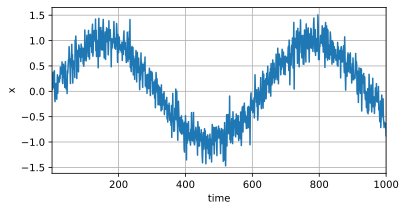

In [2]:
T = 1000  # 总共产生1000个点
time = torch.arange(1, T + 1, dtype=torch.float32)
## 正弦函数值加正态分布噪声
x = torch.sin(0.01 * time) + torch.normal(0, 0.2, (T,))
d2l.plot(time, [x], 'time', 'x', xlim=[1, 1000], figsize=(6, 3))

- 接下来将这个序列转换为模型的“特征－标签”（feature-label）。
- 基于<b>嵌入维度$\tau$</b>，将数据映射为**数据对：**$y_t = x_t$
和$\mathbf{x}_t = [x_{t-\tau}, \ldots, x_{t-1}]$。
- 你可能已经注意到，这比我们提供的数据样本少了$\tau$个，因为我们没有足够的**历史记录**来描述前$\tau$个数据样本。
  - 一个简单的解决办法是：如果拥有足够长的序列就丢弃这几项；
  - 另一个方法是用零填充序列。
- 在这里，我们仅使用前600个“特征－标签”对进行训练。


In [3]:
tau = 4
'''
features形状：(996,4)
'''
features = torch.zeros((T - tau, tau))

'''
（1）features形状是996行4列，每列都是从x中取出的。
取出方式：features每向前一列，x则向前移动一个元素，然后依次取出996个元素。
比如i=0时，features第一列就是x的从索引0到995的元素；
i=1时，features第二列就是x的从索引1到996的元素，依此类推。
（2）通过features的4个元素预测第5个元素，labels的保存顺序刚好对应features中的每一行
元素在x中的后一个元素。比如：features第一行保存的是x中的前4个元素，
labels中的第1个元素刚好是x的第5个元素（此处的顺序从1开始计起），然后依此类推。
（3）生成这样数据的目的在于：对x中1000个元素依次使用前4个元素预测紧邻该4个元素后面那个元素的值。
'''
for i in range(tau):
    features[:, i] = x[i: T - tau + i]
## labels是x的后996个元素,除去最前面4个元素后剩下的
labels = x[tau:].reshape((-1, 1))


In [4]:
## 特征和标签的形状
features.shape,labels.shape

(torch.Size([996, 4]), torch.Size([996, 1]))

In [5]:
## 每个特征(每列数据)都是将X往前移一格后取出后面966条数据
features

tensor([[ 0.2966,  0.0348,  0.3141,  0.3763],
        [ 0.0348,  0.3141,  0.3763,  0.0706],
        [ 0.3141,  0.3763,  0.0706,  0.2359],
        ...,
        [-0.7153, -0.6172, -0.6155, -0.6399],
        [-0.6172, -0.6155, -0.6399, -0.6335],
        [-0.6155, -0.6399, -0.6335, -0.6971]])

In [6]:
## 只使用前600个样本进行训练，还要利用后366个数据进行预测
## 测试单步预测的效果
batch_size, n_train = 16, 600
# 只有前n_train个样本用于训练
train_iter = d2l.load_array((features[:n_train], labels[:n_train]),
                            batch_size, is_train=True)

In [7]:
##batch的数量,38个批量，注意此处的样本数是600
600/16,type(train_iter)

(37.5, torch.utils.data.dataloader.DataLoader)

- 此处使用一个相当简单的架构训练模型：**一个拥有两个全连接层的多层感知机**，ReLU激活函数和平方损失。


In [8]:
# 初始化网络权重的函数
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)

# 一个简单的多层感知机
def get_net():
    net = nn.Sequential(nn.Linear(4, 10),
                        nn.ReLU(),
                        nn.Linear(10, 1))
    net.apply(init_weights)
    return net

# 平方损失。注意：MSELoss计算平方误差时不带系数1/2
loss = nn.MSELoss(reduction='none')

- 训练模型

In [9]:
'''
自回归系统：样本和标签都来自同一个数据集
'''
def train(net, train_iter, loss, epochs, lr):
    trainer = torch.optim.Adam(net.parameters(), lr)
    for epoch in range(epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.sum().backward()
            trainer.step()
        print(f'epoch {epoch + 1}, '
              f'loss: {d2l.evaluate_loss(net, train_iter, loss):f}')

net = get_net()
train(net, train_iter, loss, 5, 0.01)

epoch 1, loss: 0.072009
epoch 2, loss: 0.056226
epoch 3, loss: 0.057745
epoch 4, loss: 0.052670
epoch 5, loss: 0.053048


In [10]:
## DataLoader对象是可以迭代的
for X, y in train_iter:
    print(type(X))
    print(type(y))
    print(X.shape)
    print(X)
    print(y)
    break

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([16, 4])
tensor([[-1.0136, -0.7109, -0.9811, -1.2349],
        [-0.6059, -0.4143, -0.2835, -0.3982],
        [ 0.6068,  0.7691,  0.6021,  0.3710],
        [ 0.8088,  0.9167,  0.7728,  0.7976],
        [-0.2325, -0.4984, -0.3997, -0.5200],
        [ 0.4387,  0.5724,  0.5922,  0.2722],
        [-0.8231, -0.9768, -0.4170, -0.8505],
        [-0.0438,  0.4014,  0.3578,  0.5063],
        [-0.6566, -0.7557, -0.9773, -0.8231],
        [-0.1951, -0.4029, -0.6881, -0.5199],
        [ 0.8768,  0.7691,  0.7086,  0.8340],
        [ 0.3710,  0.5619,  0.6547,  0.4346],
        [-0.9357, -0.4087, -0.8158, -1.0680],
        [ 0.4488,  0.6432,  0.5343,  0.9261],
        [ 0.7691,  0.7086,  0.8340,  0.5383],
        [ 1.0415,  0.9043,  0.6348,  1.1814]])
tensor([[-0.8372],
        [-0.2344],
        [ 0.5619],
        [ 0.9696],
        [-0.6247],
        [ 1.0058],
        [-1.0305],
        [ 0.6193],
        [-0.9768],
        [-0.7810],
       

## 8.1.3 序列模型预测

- 由于训练损失很小，期望模型能有很好的工作效果。
- 在实践中意味着什么?
- 首先检查模型**预测下一个时间步**的能力，
也就是**单步预测（one-step-ahead prediction）**。


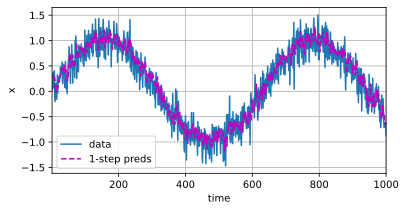

In [11]:
'''
单步预测使用features中的数据直接预测紧邻4个元素后面的元素。
图形中的红色部分是被预测的996个值，观察x中的后996个元素与预测元素是否一致。
结论：总体形状是一致的，甚至样本数据features中的后396个元素（未用于训练模型）的预测大致不差。
'''
onestep_preds = net(features)
d2l.plot([time, time[tau:]],
         [x.detach().numpy(), onestep_preds.detach().numpy()], 'time',
         'x', legend=['data', '1-step preds'], xlim=[1, 1000],
         figsize=(6, 3))

- 正如我们所料，**单步预测效果不错**。
- 即使这些预测的时间步超过了$600+4$（`n_train + tau`），
其结果看起来仍然是可信的。
- 然而有一个小问题：如果数据观察序列的时间步只到$604$，我们需要一步一步地向前迈进：
$$
\hat{x}_{605} = f(x_{601}, x_{602}, x_{603}, x_{604}), 
$$
$$
\hat{x}_{606} = f(x_{602}, x_{603}, x_{604}, \hat{x}_{605}),
$$
$$
\hat{x}_{607} = f(x_{603}, x_{604}, \hat{x}_{605}, \hat{x}_{606}),
$$
$$
\hat{x}_{608} = f(x_{604}, \hat{x}_{605}, \hat{x}_{606}, \hat{x}_{607}),
$$
$$
\hat{x}_{609} = f(\hat{x}_{605}, \hat{x}_{606}, \hat{x}_{607}, \hat{x}_{608}),
$$
$$
\ldots
$$

- 通常，对于直到$x_t$的观测序列，其在时间步$t+k$处的预测输出$\hat{x}_{t+k}$
称为$k$**步预测（$k$-step-ahead-prediction）**。
  - 由于我们的观察已经到了$x_{604}$，它的$k$步预测是$\hat{x}_{604+k}$。
  - 换句话说，我们必须使用我们**自己的预测**（而不是原始数据）来进行多步预测。
  


In [12]:
'''
从索引604(即第605个)元素开始直接预测。
第一个预测结果是：x的600-603元素预测x的604元素。
很显然没有长期记忆，只有短期记忆。
'''
## k步预测结果变量的初始化
multistep_preds = torch.zeros(T)
## 前604各元素仍是x变量的前604个元素，不做预测，直接显示曲线
multistep_preds[: n_train + tau] = x[: n_train + tau]

## i从604开始索引，net从600-603（后面依次加4）开始预测
## 注意模型是自回归的，从前4个元素预测第5个元素
for i in range(n_train + tau, T):
    multistep_preds[i] = net(multistep_preds[i - tau:i].reshape((1, -1)))

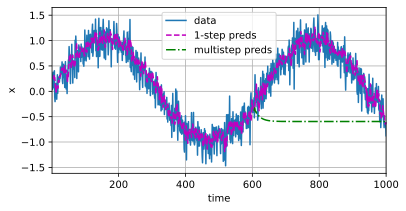

In [13]:
'''
注意detach函数的用法：
在下述代码中，detach() 函数被应用于张量对象 x、onestep_preds 和 multistep_preds，
将它们从计算图中分离出来，并返回不再具有梯度信息的新张量对象。
这是因为在绘制图形时，不需要计算梯度，只需要使用张量的数值进行绘制.
'''
d2l.plot([time, time[tau:], time[n_train + tau:]],
         [x.detach().numpy(), onestep_preds.detach().numpy(),
          multistep_preds[n_train + tau:].detach().numpy()], 'time',
         'x', legend=['data', '1-step preds', 'multistep preds'],
         xlim=[1, 1000], figsize=(6, 3))

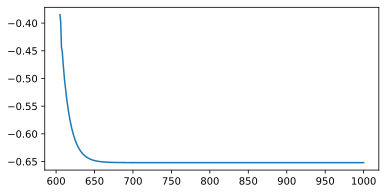

In [17]:
## 直接从600开始预测，曲线已经完全失真
plt.plot(time[n_train + tau:], multistep_preds[n_train + tau:].detach().numpy())
plt.show()

- 如上面的例子所示，绿线的预测显然并**不理想**。
经过几个预测步骤之后，预测的结果很快就会衰减到一个常数。
- 为什么这个算法效果这么差呢？事实是由于**误差的累积**：
  - 假设在步骤$1$之后，我们积累了一些错误$\epsilon_1 = \bar\epsilon$。
  - 于是，步骤$2$的输入被扰动了$\epsilon_1$，结果积累的误差是依照次序的$\epsilon_2 = \bar\epsilon + c \epsilon_1$，
其中$c$为某个常数，后面的预测误差依此类推。
- 因此误差可能会相当快地偏离真实的观测结果。
  - 例如，未来$24$小时的天气预报往往相当准确，
但超过这一点，精度就会迅速下降。
- 本章及后续章节中讨论如何改进这一点。

- 基于$k = 1, 4, 16, 64$，通过对整个序列预测的计算，
更仔细地看一下$k$步预测的困难。


In [14]:
max_steps = 64

In [15]:
'''
（1）features的行：1000-4-64+1=933，列：4+64=68
（2）迭代1设置features的前4列：从x的索引0开始往后滑动1个元素4次，
     每次按索引往前依次取出933个x的元素。
（3）迭代2设置features的后64列：每列的数据是该列的前4列代入到神经网络模型预测所得到的。
     注意这里的features已经是预测结果了
（4）注意如此设置的意义。
'''
features = torch.zeros((T - tau - max_steps + 1, tau + max_steps))
# 列i（i<tau）是来自x的观测，其时间步从（i+1）到（i+T-tau-max_steps+1）
for i in range(tau):##迭代1
    features[:, i] = x[i: i + T - tau - max_steps + 1]

# 列i（i>=tau）是来自（i-tau+1）步的预测，其时间步从（i+1）到（i+T-tau-max_steps+1）
for i in range(tau, tau + max_steps):##迭代2
    ## 没啥神秘的，就是从第64个数据开始预测而已，数据越往后进行预测，准确率越差
    ## 曲线变形越厉害
    features[:, i] = net(features[:, i - tau:i]).reshape(-1)

In [16]:
## 将向量赋给张量的某个列，注意reshape(-1)的功能
a = torch.arange(2*3).reshape(2,3)
b = torch.zeros(6,3)
b[:,1]=a.reshape(-1) #将多维张量展平成向量，然后赋给b的第2列
a, b

(tensor([[0, 1, 2],
         [3, 4, 5]]),
 tensor([[0., 0., 0.],
         [0., 1., 0.],
         [0., 2., 0.],
         [0., 3., 0.],
         [0., 4., 0.],
         [0., 5., 0.]]))

In [17]:
features.shape

torch.Size([933, 68])

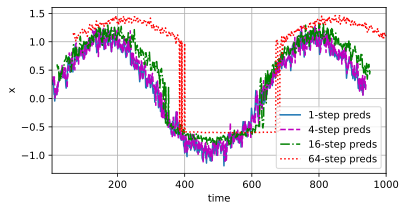

In [18]:
# 绘制各k步预测
steps = (1, 4, 16, 64)
'''
（1）time值的索引：4:937, 7:940
             19:952, 67:1000 
（2）features值的索引：索引为4, 7, 19, 67的列
'''
d2l.plot([time[tau + i - 1: T - max_steps + i] for i in steps],
         [features[:, (tau + i - 1)].detach().numpy() for i in steps], 'time', 'x',
         legend=[f'{i}-step preds' for i in steps], xlim=[5, 1000],
         figsize=(6, 3))

- 以上例子清楚地说明了当我们试图预测更远的未来时，预测的质量是如何变化的。
- 虽然“$4$步预测”看起来仍然不错，但超过这个跨度的任何预测几乎都是无用的。

## 小结

* 内插法（在现有观测值之间进行估计）和外推法（对超出已知观测范围进行预测）在实践的难度上差别很大。因此，对于你所拥有的序列数据，在训练时始终要尊重其时间顺序，即最好不要基于未来的数据进行训练。
* 序列模型的估计需要专门的统计工具，两种较流行的选择是自回归模型和隐变量自回归模型。
* 对于时间是向前推进的因果模型，正向估计通常比反向估计更容易。
* 对于直到时间步$t$的观测序列，其在时间步$t+k$的预测输出是“$k$步预测”。随着我们对预测时间$k$值的增加，会造成误差的快速累积和预测质量的极速下降。